PCA

- PCA is used to compress a dataset onto a lower-dimensional feature 
subspace.
- Feature selection finds a subset of features while PCA produces a 
smaller new set.
- PCA helps us to identify patterns in data based on the correlation 
between features.
- PCA aims to find the directions of maximum variance in high
dimensional data. 

Dataset generated

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
# Create random 2d data
mu = np.array([10,13])
sigma = np.array([[3.5,-1.8], [-1.8,3.5]])
print("Mu ", mu.shape) 
print("Sigma ", sigma.shape)
# Create 1000 samples using mean and sigma
org_data = np.random.multivariate_normal(mu, sigma,size=(1000)) 
print("Data shape ", org_data.shape)

Mu  (2,)
Sigma  (2, 2)
Data shape  (1000, 2)


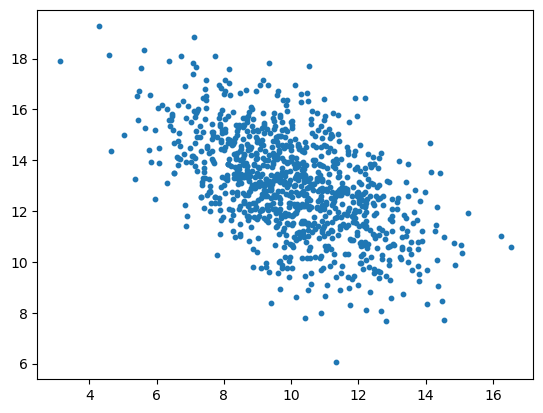

In [3]:
# scatter plot of the data
plt.scatter(org_data[:,0], org_data[:,1], s = 10)

- Mean centering is done ensuring the first PC is in the direction of 
maximum variance.
- Mean centering is done by subtracting mean from all features or 
channels

In [4]:
# Subtract mean from data
mean = np.mean(org_data, axis= 0) 
print("Mean ", mean.shape) 
mean_data = org_data- mean
print("Data after subtracting mean ", org_data.shape, "\n")

Mean  (2,)
Data after subtracting mean  (1000, 2) 



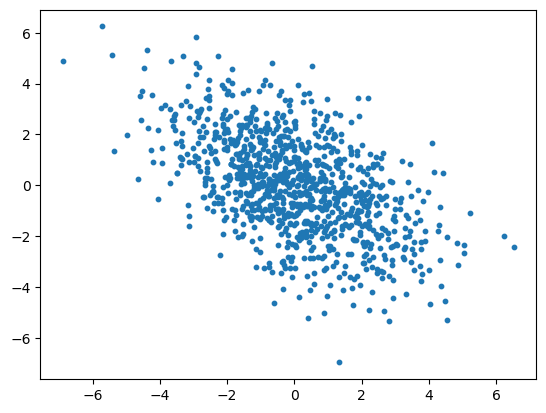

In [5]:
# scatter plot of the data
plt.scatter(mean_data[:,0], mean_data[:,1], s = 10)

Compute the covariance matrix

In [6]:
# Compute covariance matrix 
cov = np.cov(mean_data.T) # Transpose of mean_data is taken because of the way np.cov() calculates the covariance matrix
cov = np.round(cov, 2)
print("Covariance matrix ", cov.shape, "\n")
print(cov)

Covariance matrix  (2, 2) 

[[ 3.68 -1.98]
 [-1.98  3.79]]


Computing eigen vectors of the covariance matrix.

- The number of eigen vectors will be the same as the number of 
features.
- Eigen vectors are the directions of variance (principal axes).
- Eigen values indicate the magnitude of variance along those directions.

In [7]:
# Perform eigen decomposition of covariance matrix
eig_val, eig_vec  = np.linalg.eig(cov) 
print("Eigen vectors ", eig_vec, "\n")
print("Eigen values ", eig_val)

Eigen vectors  [[-0.7168567   0.69722053]
 [-0.69722053 -0.7168567 ]] 

Eigen values  [1.75423626 5.71576374]


Sort Eigenvalues and Eigenvectors 

- Sort descendingly based on the absolute eigen value.
- The eigen vector corresponding to the largest eigen value will give 
the direction of maximum variance(first principal component) and second largest value gives the second PC and so on.

In [8]:
# Sort eigen values and corresponding eigen vectors in descending order
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices] 
print("Sorted Eigen vectors ", eig_vec, "\n")
print("Sorted Eigen values ", eig_val)

Sorted Eigen vectors  [[ 0.69722053 -0.7168567 ]
 [-0.7168567  -0.69722053]] 

Sorted Eigen values  [5.71576374 1.75423626]


Computing the explained variance and select N components.

- Compute the explained variance of each 
feature by dividing its eigen value by the 
sum of all eigen values.
- Then, we take the cumulative sum of all explained variances to select N components.

In [9]:
# Get explained variance 
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val/sum_eig_val 
print(explained_variance)
cumulative_variance = np.cumsum(explained_variance)
print(cumulative_variance)

[0.76516248 0.23483752]
[0.76516248 1.        ]


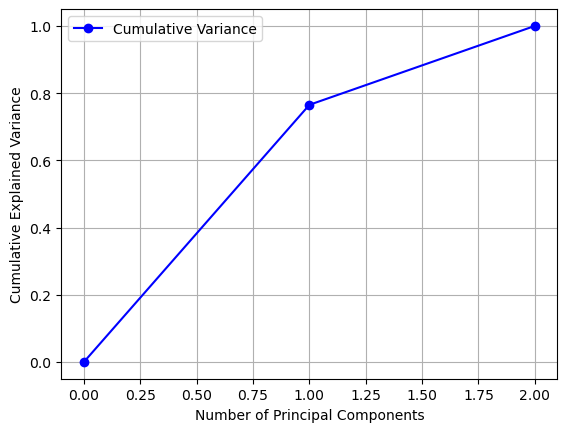

In [10]:
# Include (0, 0) point
cumulative_variance = np.insert(cumulative_variance, 0, 0)  # Insert 0 at the start
x_values = np.arange(0, len(cumulative_variance))  # Start x-axis from 0

# Plot
plt.plot(x_values, cumulative_variance, marker='o', linestyle='-', color='b', label='Cumulative Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.legend()
plt.show()

N components are selected in such a way that we get an explained variance of 0.95 
or more.

The data is projected to the new axes (principal components/eigen vectors).

In [11]:
# Take transpose of eigen vectors with data 
pca_data = np.dot(mean_data, eig_vec) 
print("Transformed data ", pca_data.shape)

Transformed data  (1000, 2)


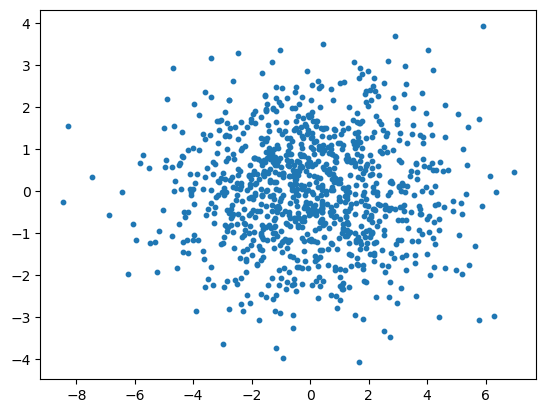

In [12]:
# scatter plot of the data
plt.scatter(pca_data[:,0], pca_data[:,1], s = 10)

 Inverting PCA and Reconstruct original data

 - Add the mean(mean was subtracted from the 
data at the beginning to center the data).

In [13]:
reconstructed_data = np.dot(pca_data, eig_vec.T) + mean
print("Reconstructed data shape: ", reconstructed_data.shape)

Reconstructed data shape:  (1000, 2)


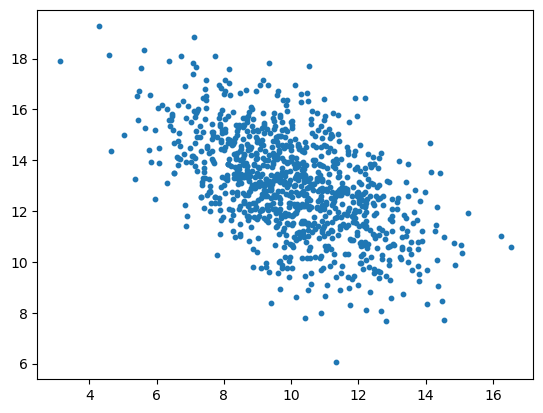

In [14]:
# scatter plot of the data
plt.scatter(reconstructed_data[:,0], reconstructed_data[:,1], s = 10)

Reconstruction loss

In [15]:
# Compute reconstruction loss
loss = np.mean(np.square(reconstructed_data - org_data)) 
print("Reconstruction loss ", loss)

Reconstruction loss  3.8259753903219074e-32


Text(0.5, 1.0, 'Reconstructed data')

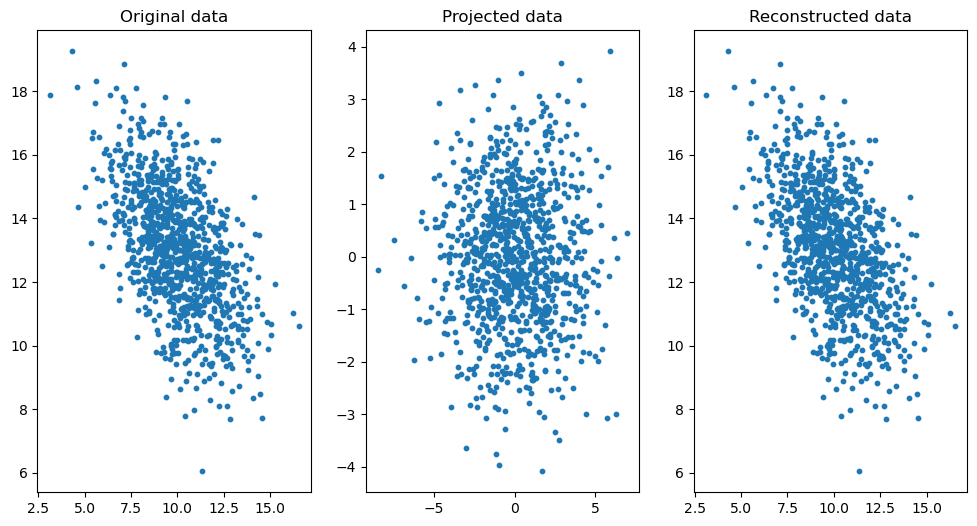

In [20]:
plt.figure(figsize=(12, 6))
plt.subplot(1,3,1)
# scatter plot of the original data
plt.scatter(org_data[:,0], org_data[:,1], s = 10)
plt.title("Original data")
plt.subplot(1,3,2)
# scatter plot of the projected data
plt.scatter(pca_data[:,0], pca_data[:,1], s = 10)
plt.title("Projected data")
plt.subplot(1,3,3)
# scatter plot of the reconstructed data
plt.scatter(reconstructed_data[:,0], reconstructed_data[:,1], s = 10)
plt.title("Reconstructed data")